In [3]:
# Imports
import os
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import json
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import logging
import time

In [4]:
# ML imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2025-04-03 19:35:07,971 - INFO - Valid languages: ['en', 'fr', 'de']
2025-04-03 19:35:07,975 - INFO - Number of classes: 3
2025-04-03 19:35:07,978 - INFO - Class distribution: {'en': 1049, 'fr': 49, 'de': 23}
2025-04-03 19:35:07,980 - INFO - Starting poster downloads...
2025-04-03 19:35:08,438 - WARNING - Failed to download poster for Coldblooded: 404
2025-04-03 19:35:09,349 - WARNING - Failed to download poster for T-Men: 404
2025-04-03 19:35:10,192 - WARNING - Failed to download poster for Winnie the Pooh and the Blustery Day: 404
2025-04-03 19:35:11,169 - WARNING - Failed to download poster for He Walked by Night: 404
2025-04-03 19:35:12,003 - WARNING - Failed to download poster for Carrington: 404
2025-04-03 19:35:14,312 - WARNING - Failed to download poster for Clerks: 404
2025-04-03 19:35:15,192 - WARNING - Failed to download poster for Live Nude Girls: 404
2025-04-03 19:35:16,079 - WARNING - Failed to download poster for Boomerang: 404
2025-04-03 19:35:17,036 - WARNING - Failed 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\aayus\anaconda3\envs\py311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\aayus\anaconda3\envs\py311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode characters in position 54-129: character maps to <undefined>
Call stack:
  File "C:\Users\aayus\anaconda3\envs\py311\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\aayus\anaconda3\envs\py311\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\aayus\anaconda3\envs\py311\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\aayus\anaconda3\envs\py311\Lib\site-packages\traitlets\config\ap

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.0714 - loss: 2.6149

2025-04-03 19:38:05,650 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.0714 - loss: 2.6149 - val_accuracy: 0.2000 - val_loss: 1.7854 - learning_rate: 0.0010
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5714 - loss: 1.9378 - val_accuracy: 0.0000e+00 - val_loss: 1.5093 - learning_rate: 0.0010
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5714 - loss: 1.4022

2025-04-03 19:38:19,155 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5714 - loss: 1.4022 - val_accuracy: 0.4000 - val_loss: 1.4891 - learning_rate: 0.0010
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7143 - loss: 0.5796 - val_accuracy: 0.4000 - val_loss: 1.6074 - learning_rate: 0.0010
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7143 - loss: 0.4687 - val_accuracy: 0.4000 - val_loss: 1.8133 - learning_rate: 0.0010
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8571 - loss: 0.6120 - val_accuracy: 0.4000 - val_loss: 2.0616 - learning_rate: 0.0010
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8571 - loss: 0.2581 - val_accuracy: 0.4000 - val_loss: 2.3122 - learning_rate: 0.0010
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7857 - loss: 0.7093 - val_accuracy: 0.4000 - val_loss: 2.7315 - learning_rate: 0.0010
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8571 - loss: 0.3854 - val_accuracy: 0.4000 - val_loss: 2.8047 - le

2025-04-03 19:38:54,449 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.9286 - loss: 0.7669 - val_accuracy: 0.6000 - val_loss: 2.8217 - learning_rate: 5.0000e-04
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9286 - loss: 0.2635 - val_accuracy: 0.6000 - val_loss: 2.7967 - learning_rate: 5.0000e-04


2025-04-03 19:39:07,952 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
2025-04-03 19:39:10,914 - INFO - Model training completed
2025-04-03 19:39:10,926 - INFO - Evaluating model on test data...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.4000 - loss: 1.1894


C:\Users\aayus\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aayus\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aayus\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2025-04

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000027F0861F560>

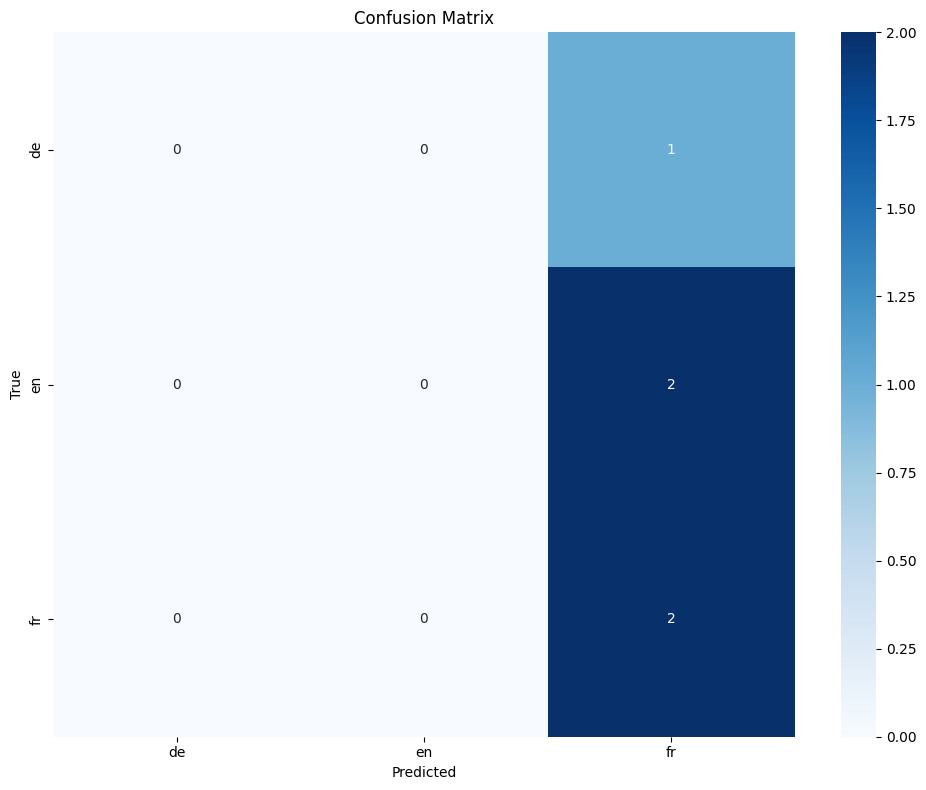

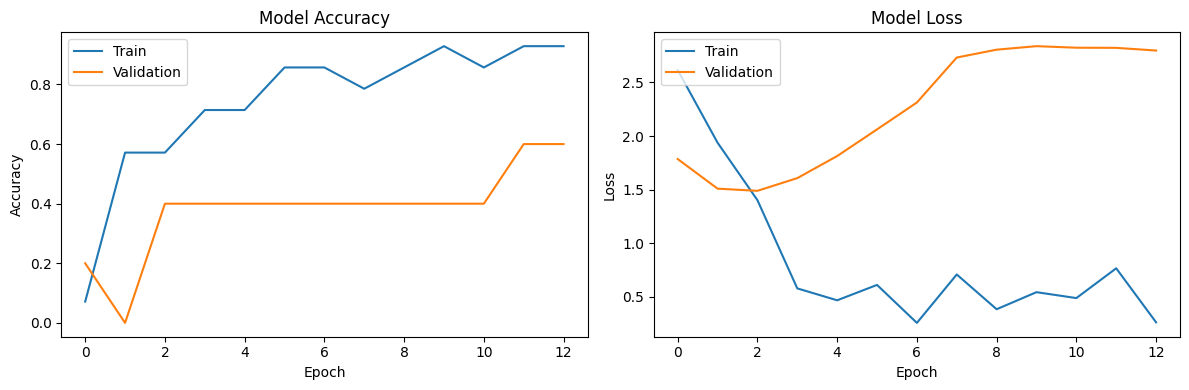

In [5]:
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[logging.FileHandler("movie_cnn.log"),
                              logging.StreamHandler()])
logger = logging.getLogger(__name__)

class MoviePosterLanguageClassifier:
    def __init__(self, 
                 csv_path, 
                 api_key, 
                 img_size=(224, 224), 
                 min_samples_per_class=10,
                 download_path='posters',
                 model_path='models',
                 base_url="https://image.tmdb.org/t/p/w500"):
        """
        Initialize the movie poster language classifier.
        
        Args:
            csv_path: Path to the movies metadata CSV
            api_key: TMDB API key
            img_size: Tuple of (height, width) for resizing images
            min_samples_per_class: Minimum number of samples required for a language class to be included
            download_path: Directory to store downloaded posters
            model_path: Directory to store trained models
            base_url: Base URL for TMDB poster images
        """
        self.csv_path = csv_path
        self.api_key = api_key
        self.img_size = img_size
        self.min_samples_per_class = min_samples_per_class
        self.download_path = download_path
        self.model_path = model_path
        self.base_url = base_url
        
        # Create directories if they don't exist
        for path in [self.download_path, self.model_path]:
            if not os.path.exists(path):
                os.makedirs(path)
                
        # Load and process the data
        self.df = self._load_data()
        self.language_counts = self.df['original_language'].value_counts()
        self.valid_languages = self.language_counts[self.language_counts >= self.min_samples_per_class].index.tolist()
        
        # Filter dataframe to include only languages with enough samples
        self.df = self.df[self.df['original_language'].isin(self.valid_languages)]
        
        # Encode language labels
        self.label_encoder = LabelEncoder()
        self.df['language_encoded'] = self.label_encoder.fit_transform(self.df['original_language'])
        self.num_classes = len(self.valid_languages)
        
        logger.info(f"Valid languages: {self.valid_languages}")
        logger.info(f"Number of classes: {self.num_classes}")
        logger.info(f"Class distribution: {self.language_counts[self.valid_languages].to_dict()}")
    
    def _load_data(self):
        """Load and preprocess the movie metadata CSV."""
        df = pd.read_csv(self.csv_path)
        # Keep only necessary columns
        df = df[['id', 'original_language', 'poster_path', 'title']]
        # Remove rows with missing poster paths
        df = df.dropna(subset=['poster_path'])
        return df
    
    def download_posters(self, limit=None):
        """
        Download movie posters from TMDB.
        
        Args:
            limit: Maximum number of posters to download per language (for balanced dataset)
        
        Returns:
            List of successful downloads with file paths
        """
        logger.info("Starting poster downloads...")
        
        # Create separate folders for each language
        for lang in self.valid_languages:
            lang_path = os.path.join(self.download_path, lang)
            if not os.path.exists(lang_path):
                os.makedirs(lang_path)
        
        # For balanced dataset, limit samples per language
        if limit:
            dfs = []
            for lang in self.valid_languages:
                lang_df = self.df[self.df['original_language'] == lang]
                if len(lang_df) > limit:
                    lang_df = lang_df.sample(limit, random_state=42)
                dfs.append(lang_df)
            download_df = pd.concat(dfs)
        else:
            download_df = self.df
        
        successful_downloads = []
        
        # Download posters
        for _, row in tqdm(download_df.iterrows(), total=len(download_df)):
            lang = row['original_language']
            poster_path = row['poster_path']
            movie_id = row['id']
            save_path = os.path.join(self.download_path, lang, f"{movie_id}.jpg")
            
            # Skip if already downloaded
            if os.path.exists(save_path):
                successful_downloads.append((save_path, lang))
                continue
            
            try:
                # Construct URL and download image
                url = f"{self.base_url}{poster_path}?api_key={self.api_key}"
                response = requests.get(url, timeout=10)
                
                if response.status_code == 200:
                    img = Image.open(BytesIO(response.content))
                    img = img.resize(self.img_size)
                    img.save(save_path)
                    successful_downloads.append((save_path, lang))
                else:
                    logger.warning(f"Failed to download poster for {row['title']}: {response.status_code}")
                
                # Be nice to the API
                time.sleep(0.5)
                
            except Exception as e:
                logger.error(f"Error downloading poster for {row['title']}: {str(e)}")
        
        logger.info(f"Downloaded {len(successful_downloads)} posters successfully")
        
        # Save the successful downloads list
        with open('successful_downloads.pkl', 'wb') as f:
            pickle.dump(successful_downloads, f)
            
        return successful_downloads
    
    def load_images(self, download_list=None):
        """
        Load images from disk and prepare for training.
        
        Args:
            download_list: List of (file_path, language) tuples, if None will try to load from pickle
        
        Returns:
            X: Image data as numpy array
            y: Encoded labels
            file_paths: List of file paths corresponding to the loaded images
        """
        if download_list is None:
            try:
                with open('successful_downloads.pkl', 'rb') as f:
                    download_list = pickle.load(f)
            except FileNotFoundError:
                logger.error("No download list found. Please run download_posters first.")
                return None, None, None
        
        logger.info(f"Loading {len(download_list)} images...")
        
        X = []
        y = []
        file_paths = []
        
        for file_path, lang in tqdm(download_list):
            try:
                img = Image.open(file_path)
                img_array = np.array(img) / 255.0  # Normalize to [0,1]
                
                # Handle grayscale images by duplicating to 3 channels
                if len(img_array.shape) == 2:
                    img_array = np.stack((img_array,) * 3, axis=-1)
                
                # Handle RGBA images by dropping alpha channel
                if img_array.shape[2] == 4:
                    img_array = img_array[:, :, :3]
                
                X.append(img_array)
                y.append(self.label_encoder.transform([lang])[0])
                file_paths.append(file_path)
            except Exception as e:
                logger.error(f"Error loading image {file_path}: {str(e)}")
        
        X = np.array(X)
        y = np.array(y)
        
        logger.info(f"Loaded {len(X)} images successfully")
        logger.info(f"X shape: {X.shape}, y shape: {y.shape}")
        
        return X, y, file_paths
    
    def build_model(self):
        """Build and compile the CNN model."""
        model = Sequential([
            # First convolutional block
            Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(*self.img_size, 3)),
            BatchNormalization(),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            
            # Second convolutional block
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            
            # Third convolutional block
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            
            # Flatten and fully connected layers
            Flatten(),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(self.num_classes, activation='softmax')
        ])
        
        # Compile the model with Adam optimizer
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        logger.info(f"Model built with output shape for {self.num_classes} classes")
        model.summary(print_fn=logger.info)
        
        return model
    
    def train_model(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
        """
        Train the CNN model.
        
        Args:
            X_train: Training images
            y_train: Training labels
            X_val: Validation images
            y_val: Validation labels
            epochs: Number of epochs to train
            batch_size: Batch size for training
        
        Returns:
            Trained model and training history
        """
        # Build model
        model = self.build_model()
        
        # Define callbacks
        callbacks = [
            EarlyStopping(patience=10, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6),
            ModelCheckpoint(
                filepath=os.path.join(self.model_path, 'best_model.h5'),
                save_best_only=True,
                monitor='val_accuracy'
            )
        ]
        
        # Data augmentation for training
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        datagen.fit(X_train)
        
        # Train the model
        logger.info("Starting model training...")
        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=batch_size),
            steps_per_epoch=len(X_train) // batch_size,
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=callbacks
        )
        
        # Save the final model
        model.save(os.path.join(self.model_path, 'final_model.h5'))
        
        # Save label encoder
        with open(os.path.join(self.model_path, 'label_encoder.pkl'), 'wb') as f:
            pickle.dump(self.label_encoder, f)
        
        logger.info("Model training completed")
        
        return model, history
    
    def evaluate_model(self, model, X_test, y_test):
        """
        Evaluate the trained model on test data.
        
        Args:
            model: Trained Keras model
            X_test: Test images
            y_test: Test labels
        
        Returns:
            Test loss and accuracy
        """
        logger.info("Evaluating model on test data...")
        
        # Get model predictions
        y_pred_prob = model.predict(X_test)
        y_pred = np.argmax(y_pred_prob, axis=1)
        
        # Calculate metrics
        test_loss, test_acc = model.evaluate(X_test, y_test)
        
        # Generate classification report
        report = classification_report(
            y_test, 
            y_pred, 
            target_names=self.label_encoder.classes_,
            output_dict=True
        )
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=self.label_encoder.classes_,
            yticklabels=self.label_encoder.classes_
        )
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.savefig(os.path.join(self.model_path, 'confusion_matrix.png'))
        
        # Save classification report
        with open(os.path.join(self.model_path, 'classification_report.json'), 'w') as f:
            json.dump(report, f, indent=4)
        
        logger.info(f"Test accuracy: {test_acc:.4f}")
        logger.info(f"Test loss: {test_loss:.4f}")
        
        return test_loss, test_acc
    
    def predict_language(self, image_path=None, image_url=None):
        """
        Predict the language of a movie based on its poster.
        
        Args:
            image_path: Path to local image file
            image_url: URL to image file
        
        Returns:
            Predicted language and confidence
        """
        # Load the best model
        model_path = os.path.join(self.model_path, 'best_model.h5')
        if not os.path.exists(model_path):
            logger.error("No trained model found. Please train the model first.")
            return None, None
        
        model = load_model(model_path)
        
        # Load label encoder
        with open(os.path.join(self.model_path, 'label_encoder.pkl'), 'rb') as f:
            le = pickle.load(f)
        
        # Load and preprocess the image
        if image_path:
            img = Image.open(image_path)
        elif image_url:
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))
        else:
            logger.error("Either image_path or image_url must be provided")
            return None, None
        
        # Preprocess the image
        img = img.resize(self.img_size)
        img_array = np.array(img) / 255.0
        
        # Handle grayscale images
        if len(img_array.shape) == 2:
            img_array = np.stack((img_array,) * 3, axis=-1)
        
        # Handle RGBA images
        if img_array.shape[2] == 4:
            img_array = img_array[:, :, :3]
        
        # Add batch dimension
        img_array = np.expand_dims(img_array, axis=0)
        
        # Make prediction
        pred = model.predict(img_array)[0]
        pred_idx = np.argmax(pred)
        confidence = pred[pred_idx]
        
        # Map back to language
        language = le.inverse_transform([pred_idx])[0]
        
        logger.info(f"Predicted language: {language} with confidence {confidence:.4f}")
        
        return language, confidence
    
    def run_pipeline(self, download_limit=100, test_size=0.2, val_size=0.25, epochs=30, batch_size=32):
        """
        Run the complete pipeline: download, train, evaluate.
        
        Args:
            download_limit: Maximum number of posters to download per language
            test_size: Portion of data to use for testing
            val_size: Portion of training data to use for validation
            epochs: Number of training epochs
            batch_size: Training batch size
        """
        # Step 1: Download posters
        download_list = self.download_posters(limit=download_limit)
        
        # Step 2: Load images
        X, y, file_paths = self.load_images(download_list)
        
        if X is None or len(X) == 0:
            logger.error("No images loaded. Aborting pipeline.")
            return
        
        # Step 3: Split data
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )
        
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val, test_size=val_size, random_state=42, stratify=y_train_val
        )
        
        logger.info(f"Training set: {X_train.shape[0]} samples")
        logger.info(f"Validation set: {X_val.shape[0]} samples")
        logger.info(f"Test set: {X_test.shape[0]} samples")
        
        # Step 4: Train model
        model, history = self.train_model(
            X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size
        )
        
        # Step 5: Evaluate model
        test_loss, test_acc = self.evaluate_model(model, X_test, y_test)
        
        # Plot training history
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.model_path, 'training_history.png'))
        
        logger.info("Pipeline completed successfully")
        
        return model, history, test_loss, test_acc

In [ ]:
classifier = MoviePosterLanguageClassifier(
    csv_path='small_movies_metadata.csv',
    api_key='YOUR_TMDB_API_KEY',  # Replace with your TMDB API key
    img_size=(224, 224),
    min_samples_per_class=20,  # Only include languages with at least 20 samples
    download_path='movie_posters',
    model_path='language_model'
)

# Run the full pipeline
model, history, test_loss, test_acc = classifier.run_pipeline(
    download_limit=100,  # Max 100 posters per language for balance
    test_size=0.2,
    val_size=0.25,
    epochs=30,
    batch_size=32
)

# Example prediction
language, confidence = classifier.predict_language(
    image_url="https://image.tmdb.org/t/p/w500/rhIRbceoE9lR4veEXuwCC2wARtG.jpg"
)
print(f"Predicted language: {language} with confidence {confidence:.2f}")